In [115]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from datetime import datetime

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#word count
from collections import Counter

#word clouds
import heapq
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import collections
import matplotlib.cm as cm
from matplotlib import rcParams
from tqdm import tqdm

#sentiment analysis
from textblob import TextBlob

#text preprocessing
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('wordnet')

#hide warning
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/YushuRao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/YushuRao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [116]:
brooklyn_tweets = pd.read_csv("Data/brooklyn_tweets.csv",error_bad_lines=False,encoding= 'unicode_escape')

b'Skipping line 5999: expected 34 fields, saw 59\nSkipping line 6748: expected 34 fields, saw 59\n'
b'Skipping line 20850: expected 34 fields, saw 59\nSkipping line 30639: expected 34 fields, saw 59\n'
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning:

Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.



In [117]:
brooklyn_case = pd.read_csv("Data/boroughs-case-hosp-death.csv")

In [118]:
brooklyn_case = brooklyn_case[brooklyn_case.date <= '06/30/2020']

In [119]:
df = brooklyn_tweets

In [120]:
len(df)

46427

In [121]:
# drop duplicate rows
df.drop_duplicates(inplace =True)
df.drop_duplicates(subset = ['tweet'],inplace =True)

In [122]:
#drop null
df.dropna(subset = ['date'],inplace=True)
df.dropna(subset = ['hashtags'],inplace=True)

In [123]:
df['date'] = pd.to_datetime(df['date'])
print('shape:', df.shape)
print('number of tweets:', df['tweet'].nunique())
print('number of users:', df['user_id'].nunique())

print("range:", df['date'].min(),",", df['date'].max())
print("dates:",df['date'].nunique())

shape: (42631, 34)
number of tweets: 42631
number of users: 13830
range: 2020-01-03 00:00:00 , 2020-06-30 00:00:00
dates: 170


In [124]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.267233e+18,1.267233e+18,1.590967e+12,2020-05-31,16:14:33,PDT,205805489.0,adventurousz,Zeona McIntyre,NaN,...,"40.646232,-73.954012,6mi",NaN,NaN,NaN,NaN,"[{'user_id': '205805489', 'username': 'Adventu...",NaN,NaN,NaN,NaN
1,1.267228e+18,1.267228e+18,1.590966e+12,2020-05-31,15:55:34,PDT,48112717.0,watergatesummer,enigma4ever ð·ð½ ðð¥ ðð¹ð ð...,NaN,...,"40.646232,-73.954012,6mi",NaN,NaN,NaN,NaN,"[{'user_id': '48112717', 'username': 'watergat...",NaN,NaN,NaN,NaN
2,1.267227e+18,1.267227e+18,1.590965e+12,2020-05-31,15:51:37,PDT,105017546.0,fosterhood,Rebecca,NaN,...,"40.646232,-73.954012,6mi",NaN,NaN,NaN,NaN,"[{'user_id': '105017546', 'username': 'fosterh...",NaN,NaN,NaN,NaN
3,1.267225e+18,1.267225e+18,1.590965e+12,2020-05-31,15:41:10,PDT,308851637.0,ingridebap,Ingrid E Baptista,NaN,...,"40.646232,-73.954012,6mi",NaN,NaN,NaN,NaN,"[{'user_id': '308851637', 'username': 'Ingride...",NaN,NaN,NaN,NaN
4,1.267223e+18,1.267223e+18,1.590964e+12,2020-05-31,15:34:56,PDT,257684977.0,mendejito,Jonathan Mendez,NaN,...,"40.646232,-73.954012,6mi",NaN,NaN,NaN,NaN,"[{'user_id': '257684977', 'username': 'Mendeji...",NaN,NaN,NaN,NaN


In [125]:
# get information about the number of missing values and their percentage
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table(df)

Your selected dataframe has 34 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
source,42631,100.0
user_rt_id,42631,100.0
user_rt,42631,100.0
retweet_id,42631,100.0
retweet_date,42631,100.0
translate,42631,100.0
trans_src,42631,100.0
trans_dest,42631,100.0
place,41804,98.1
quote_url,37822,88.7


In [126]:
df = df[['date','time','tweet','hashtags']]

In [127]:
df.head()

,date,time,tweet,hashtags
0,2020-05-31,16:14:33,Has the Coronavirus affected my Net Worth? Let...,[]
1,2020-05-31,15:55:34,Please read this...is Covid a Blood Vessel Dis...,[]
2,2020-05-31,15:51:37,I keep thinking about how #COVID19 most of NYC...,"['#covid19', '#blacklivesmatter']"
3,2020-05-31,15:41:10,@TheRevAl since blacks were most affected & in...,"['#covid19', '#heroesact', '#justiceforgeorge'..."
4,2020-05-31,15:34:56,We are living difficult times please make sure...,"['#coronavirus', '#masc', '#mascara']"


/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(0.5, 1.0, 'Number of Tweets per week near Brooklyn')

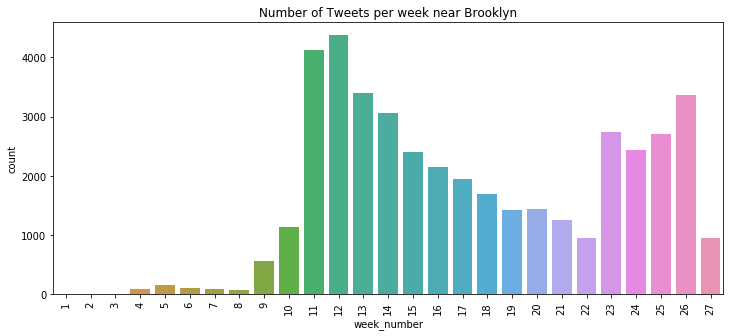

In [128]:
# plot number of tweets per week
df['date'] = pd.to_datetime(df['date'])
df['week_number'] = df['date'].dt.week
fig = plt.figure(figsize = (12,5))
chart = sns.countplot(df['week_number'], order = sorted(df['week_number'].unique()))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_title('Number of Tweets per week near Brooklyn')

In [129]:
daily_count = df[df.date>='2020-02-29'].groupby('date').count()['tweet'].reset_index().sort_values(by='date')

In [130]:
brooklyn_case['date'] = pd.to_datetime(brooklyn_case['date'])

In [131]:
daily_count = pd.merge(daily_count, brooklyn_case, on='date', how='inner')

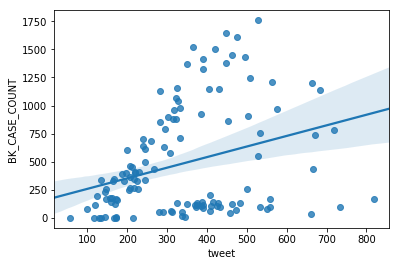

In [132]:
ax = sns.regplot(x="tweet", y="BK_CASE_COUNT", data=daily_count)

In [133]:
daily_count.corr()

,tweet,BK_CASE_COUNT
tweet,1.000000,0.315093
BK_CASE_COUNT,0.315093,1.000000


In [16]:
result = []
for hashtag in df.hashtags:
    result.extend(re.findall(r'\B#\w*[a-zA-Z]+\w*',hashtag))

In [17]:
#remove covid OR covid-19 OR covid19 OR Coronavirus OR Corona
result[:] = (value for value in result if value != '#covid')
result[:] = (value for value in result if value != '#covid19')
result[:] = (value for value in result if value != '#covid_19')
result[:] = (value for value in result if value != '#covidー19')
result[:] = (value for value in result if value != '#coronavirus')
result[:] = (value for value in result if value != '#corona')

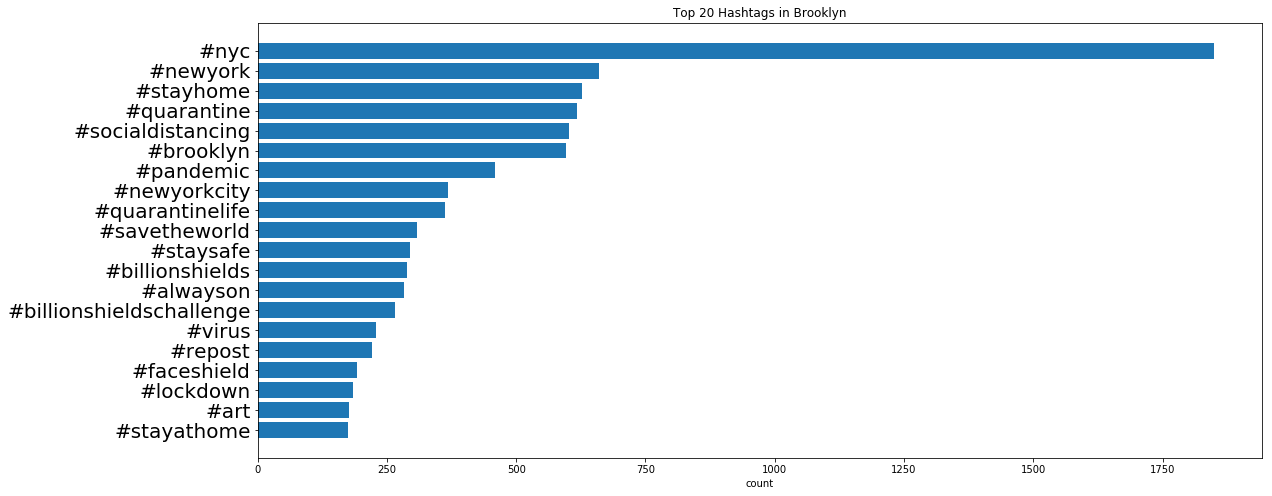

In [18]:
d = Counter(result)
top20 = d.most_common(20)

fig, ax = plt.subplots(figsize=(18,8))

#plt.bar(range(len(top20)), [val[1] for val in top20], align='center')
#plt.xticks(range(len(top20)), [val[0] for val in top20],fontsize=20)
#plt.xticks(rotation=90)

hashtags = [val[0] for val in top20]
y_pos = np.arange(len(hashtags))
count = [val[1] for val in top20]

ax.barh(y_pos, count,align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(hashtags,fontsize = 20)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('count')
ax.set_title('Top 20 Hashtags in Brooklyn')

plt.show()

# Text Preprocessing

In [19]:
# get rid of all kinds of strange symbols from text
def preprocess(Text):
    Text = Text.str.replace("(<br/>)", "")
    Text = Text.str.replace('(<a).*(>).*(</a>)', '')
    Text = Text.str.replace('(&amp)', '')
    Text = Text.str.replace('(&gt)', '')
    Text = Text.str.replace('(&lt)', '')
    Text = Text.str.replace('(\xa0…)', ' ')  
    Text = Text.str.replace('(\n)', ' ')
    Text = Text.str.replace('+', '')
    return Text

# remove urls from text
def remove_urls(row):
    url_pattern = re.compile(r"https?://\S+|www\.\S+")
    row =  url_pattern.sub(r'', row)
    return row

# remove @accounts (@[A-Za-z0–9]+)|, emojis，#hashtags, com frin text
def removes(row):
    url_pattern = re.compile(r"(\w+:\/\/\S+)|(#(\w+))|(.twitter.com/[A-Za-z0–9]+)")
    row =  url_pattern.sub(r'', row)
    return row

In [20]:
# apply all the preprocess functions
df['tweet_nlp'] = preprocess(df.tweet)
df['tweet_nlp'] = df['tweet_nlp'].apply(remove_urls)
df['tweet_nlp'] = df['tweet_nlp'].apply(removes)

/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [21]:
df.head()

,date,time,tweet,hashtags,week_number,tweet_nlp
0,2020-05-31,16:14:33,Has the Coronavirus affected my Net Worth? Let...,[],22,Has the Coronavirus affected my Net Worth? Let...
1,2020-05-31,15:55:34,Please read this...is Covid a Blood Vessel Dis...,[],22,Please read this...is Covid a Blood Vessel Dis...
2,2020-05-31,15:51:37,I keep thinking about how #COVID19 most of NYC...,"['#covid19', '#blacklivesmatter']",22,I keep thinking about how most of NYCâs whi...
3,2020-05-31,15:41:10,@TheRevAl since blacks were most affected & in...,"['#covid19', '#heroesact', '#justiceforgeorge'...",22,@TheRevAl since blacks were most affected & in...
4,2020-05-31,15:34:56,We are living difficult times please make sure...,"['#coronavirus', '#masc', '#mascara']",22,We are living difficult times please make sure...


In [22]:
# Handling Abbreviation
def decontracted(phrase):
    phrase = re.sub(r"that\'s", "that is", phrase)   
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# decontracte words
df.tweet_nlp = df.tweet_nlp.apply(lambda x: decontracted(x).lower())

/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [23]:
# remove stop words
stop_words = stopwords.words('english')
not_stopwords = {}
common_words =['com','twitter','please','covid','corona','covid-19','coronavirus','covid19'
               'the','would','could','can','may','must', 
              # 'us','i','you','this','we','me','that','it',
               'de','s','pic','t','m','en','la','que','don','re','e','el','ca']
stop_words.extend(word for word in common_words if word not in stop_words)
final_stop_words = set([word for word in stop_words if word not in not_stopwords])
df.tweet_nlp = df.tweet_nlp.apply(lambda x: ' '.join([word for word in x.split() if word not in final_stop_words]))

In [24]:
# remove whitespace and punctuations
rm_punc = re.compile(r"(\W)")
rm_space = re.compile(r"(\s+)")
df.tweet_nlp = df.tweet_nlp.apply(lambda x: rm_punc.sub(' ', x))
df.tweet_nlp = df.tweet_nlp.apply(lambda x: rm_space.sub(' ', x))

# Sentiment Analysis

In [25]:
import pickle
import gensim

In [26]:
from keras.layers import Activation, Dense, Dropout, Embedding,LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.
/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning:

Passing (type, 1) or '1type' as a syno

In [27]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
SENTIMENT_THRESHOLDS = (0.3, 0.7)
def decode_sentiment(label):
    return decode_map[int(label)]

In [28]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = 'NEUTRAL'
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = 'NEGATIVE'
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = 'POSITIVE'

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [29]:
tokenizer = pickle.load(open("models/tokenizer.pkl", "rb" ))

In [30]:
w2v_model = gensim.models.Word2Vec.load("models/model.w2v")

In [31]:
W2V_SIZE = 300
SEQUENCE_LENGTH = 300

In [32]:
vocab_size = len(tokenizer.word_index) + 1

In [33]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(290419, 300)


In [34]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

In [35]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary() 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          87125700  
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 300)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 87,286,201
Trainable params: 160,501
Non-trainable params: 87,125,700
_________________________________________________________________


In [36]:
from keras.models import load_model
model = load_model('models/model.h5')

Instructions for updating:
Use tf.cast instead.


In [37]:
def predict(text, include_neutral=True):
    #start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score)}

In [38]:
df['label'] = df.tweet_nlp.apply(lambda x:predict(x)['label'])

/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [39]:
df['score'] = df.tweet_nlp.apply(lambda x:predict(x)['score'])

/Users/YushuRao/Documents/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [40]:
df.to_csv('brooklyn_tweets_nlp.csv')

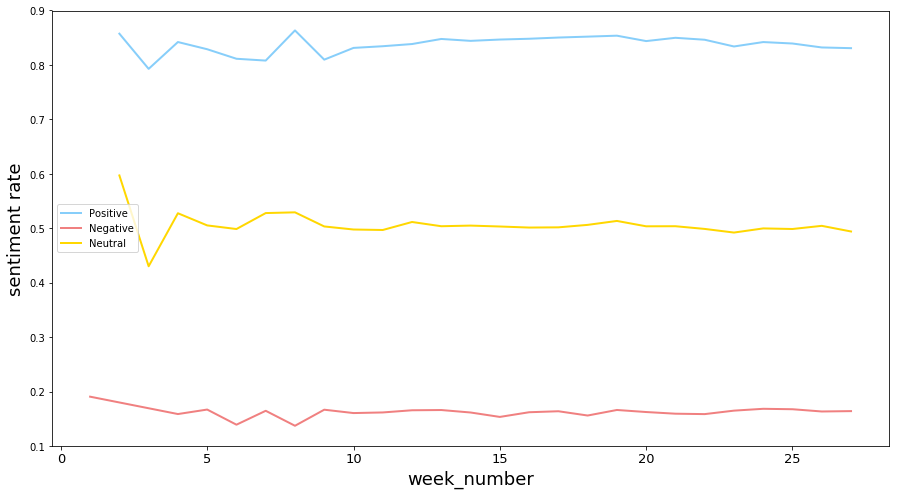

In [55]:
label = df.groupby(['week_number','label']).mean()['score'].reset_index().sort_values(by='week_number')

positive = label[label['label']=='POSITIVE']
negative = label[label['label']=='NEGATIVE']
neutral = label[label['label']=='NEUTRAL']



fig, ax = plt.subplots(figsize=(15,8))

plt.plot(positive['week_number'], positive['score'], color='lightskyblue', linewidth = 2,  label = 'Positive')
plt.plot(negative['week_number'], negative['score'], color='lightcoral', linewidth = 2,  label = 'Negative')
plt.plot(neutral['week_number'], neutral['score'], color='gold', linewidth = 2,  label = 'Neutral')
plt.xlabel('week_number', fontsize=18)
plt.ylabel('sentiment rate', fontsize=18)
plt.title('')
plt.tick_params(axis='x', which='major', labelsize=13)
plt.legend()
#plt.legend(loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize=18)
# plt.savefig('plots/lineplot_sentiment_type.png')
plt.show()

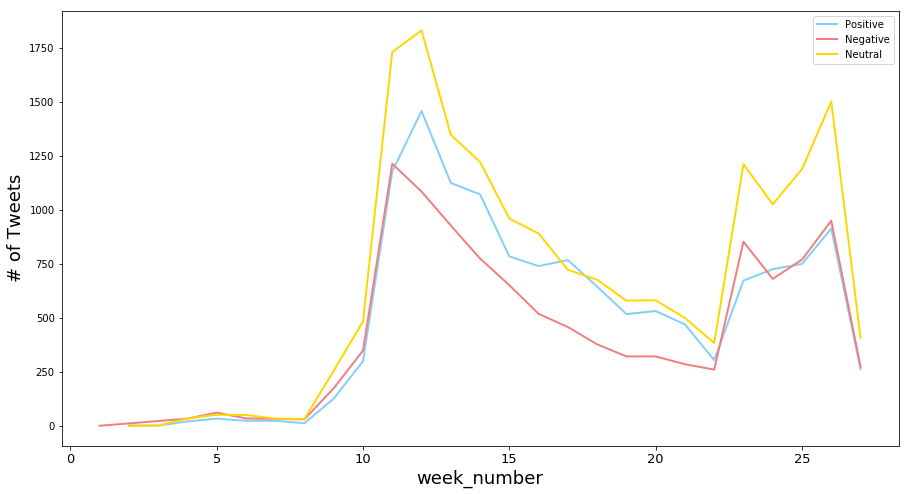

In [56]:
label = df.groupby(['week_number','label']).count()['tweet'].reset_index().sort_values(by='week_number')

positive = label[label['label']=='POSITIVE']
negative = label[label['label']=='NEGATIVE']
neutral = label[label['label']=='NEUTRAL']



fig, ax = plt.subplots(figsize=(15,8))

plt.plot(positive['week_number'], positive['tweet'], color='lightskyblue', linewidth = 2,  label = 'Positive')
plt.plot(negative['week_number'], negative['tweet'], color='lightcoral', linewidth = 2,  label = 'Negative')
plt.plot(neutral['week_number'], neutral['tweet'], color='gold', linewidth = 2,  label = 'Neutral')
plt.xlabel('week_number', fontsize=18)
plt.ylabel('# of Tweets', fontsize=18)
plt.title('')
plt.tick_params(axis='x', which='major', labelsize=13)
plt.legend()
#plt.legend(loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize=18)
# plt.savefig('plots/lineplot_sentiment_type.png')
plt.show()

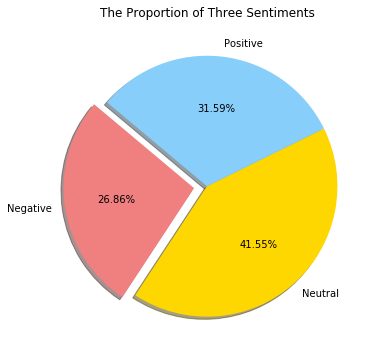

In [43]:
# draw a pie chart to show the ratio of 'Negative', 'Neutral' and 'Positive' tweets
fig = plt.figure(figsize=(6,6))
labels = 'Negative', 'Neutral', 'Positive'
sizes = df.groupby('label').tweet.count().values
colors = ['lightcoral', 'gold', 'lightskyblue']
explode = (0.1, 0, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.title('The Proportion of Three Sentiments')
plt.show()

# Word Cloud

In [44]:
# Create word frequency count
num_words = 300
word2count = {}
for i in tqdm(range(len(df['tweet_nlp']))): 
    for word in df['tweet_nlp'].iloc[i].split():
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1
            
freq_words = heapq.nlargest(num_words, word2count, key=word2count.get)

100%|██████████| 42631/42631 [00:01<00:00, 36776.26it/s]


In [46]:
from wordcloud import WordCloud, ImageColorGenerator
from os import path, getcwd
from PIL import Image
d = getcwd()
mask = np.array(Image.open(path.join(d,'twitter.png')).convert("RGB"))
color = np.array(Image.open(path.join(d,'color.png')).convert("RGB"))
red = np.array(Image.open(path.join(d,'red.png')).convert("RGB"))

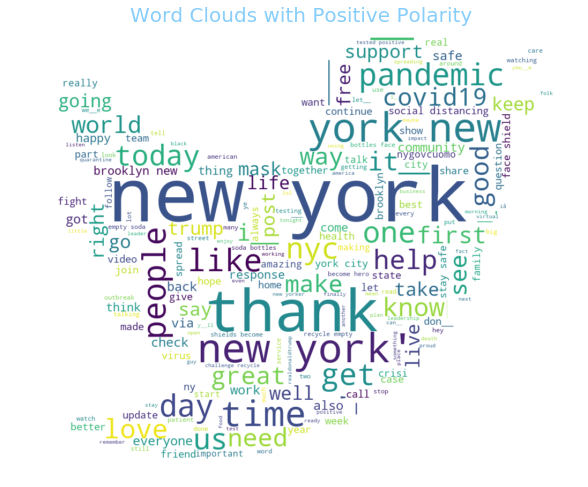

In [47]:
wordcloud = WordCloud(width=600, height=500, random_state=1, max_words=300, 
                          min_font_size=10,  max_font_size=140,
                          background_color='white',stopwords=stop_words,mask = mask)
wordcloud.generate(str(set(df['tweet_nlp'][df['label'] == 'POSITIVE'])))

plt.figure(figsize=(16,8))
plt.title("Word Clouds with Positive Polarity", fontsize=20,color='lightskyblue')
plt.imshow(wordcloud, interpolation='bilinear',cmap='jet')
plt.axis('off')
plt.show()

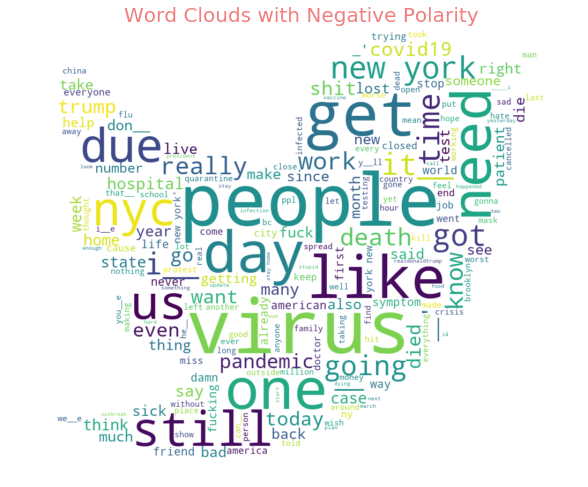

In [48]:
wordcloud = WordCloud(width=600, height=500, random_state=1, max_words=300, 
                          min_font_size=10,  max_font_size=140,
                          background_color='white',stopwords=stop_words,mask = mask)
wordcloud.generate(str(set(df['tweet_nlp'][df['label'] == 'NEGATIVE'])))

plt.figure(figsize=(16,8))
plt.title("Word Clouds with Negative Polarity", fontsize=20,color='lightcoral')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()